## Part I – Implementing a kNN from scratch:

Use this notebook to run experiments and plot results easily. You do not need to submit it, but you may use some of the generated plots in your report.

In [1]:
import utils
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap

You can use the routine below to plot your results. Be careful to respect the naming conventions of the variables. This means X - training inputs, y - training labels, X_test - test inputs and y_test - predicted labels

In [2]:
data_folder = './data/'

In [3]:
#1- Data loading
training_ds = pd.read_csv(data_folder + 'training.csv', sep=',')
validation_ds = pd.read_csv(data_folder + 'validation.csv', sep=',')

In [4]:
#we add the column of ones to X. Check scikit-learn documentation to see how this is achieved
# poly = PolynomialFeatures(1)  
# X = poly.fit_transform(X)
X = training_ds[["X1", "X2"]].to_numpy()
y = training_ds["y"].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

In [21]:
X_validation = validation_ds[["X1", "X2"]].to_numpy()
y_validation = validation_ds["y"].to_numpy()

X_test[:,0][1:5]

array([-3.82932304, -3.80932304, -3.78932304, -3.76932304])

In [6]:
# Create a grid of testing points
h=.02 # space in the grid
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
# xx is the x-axis coordinate of the points in the test set
# yy is the y-axis coordinate of the points in the test set
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
# X_test contains the test set inputs (xx,yy)
X_test = np.c_[xx.ravel(), yy.ravel()]

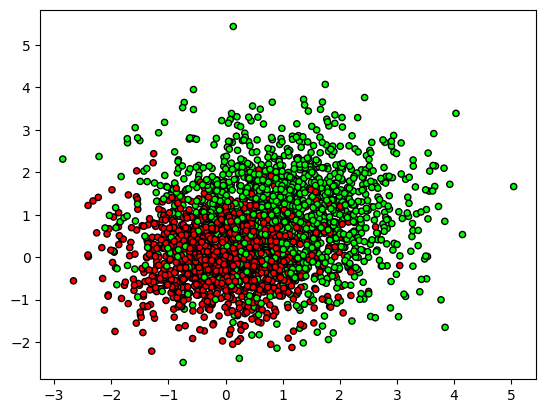

In [7]:
cmap = ListedColormap(['#FF0000','#00FF00'])
plt.figure()
plt.scatter(X[:,0],X[:,1], c=y, cmap=cmap, edgecolor='k', s=20)
plt.show()

In [8]:
# importing KNN to the mix 
from knn import KNN
clf = KNN(k=5)
clf.train(X_train, y_train)


p = 1 # Euclidian
y_pred = clf.predict(X_test,p)

In [9]:
# utils.plot_results(xx,yy, X, y, y_test_k3, "k=" + str(k))

In [22]:
print(y_pred[0:5])

[0.0, 0.0, 0.0, 0.0, 0.0]


In [11]:
# Manually checking the accuracy
acc = clf.accuracy_score(y_test, y_pred)

AttributeError: 'KNN' object has no attribute 'accuracy_score'

In [ ]:
acc

## Part II – The curse of dimensionality:

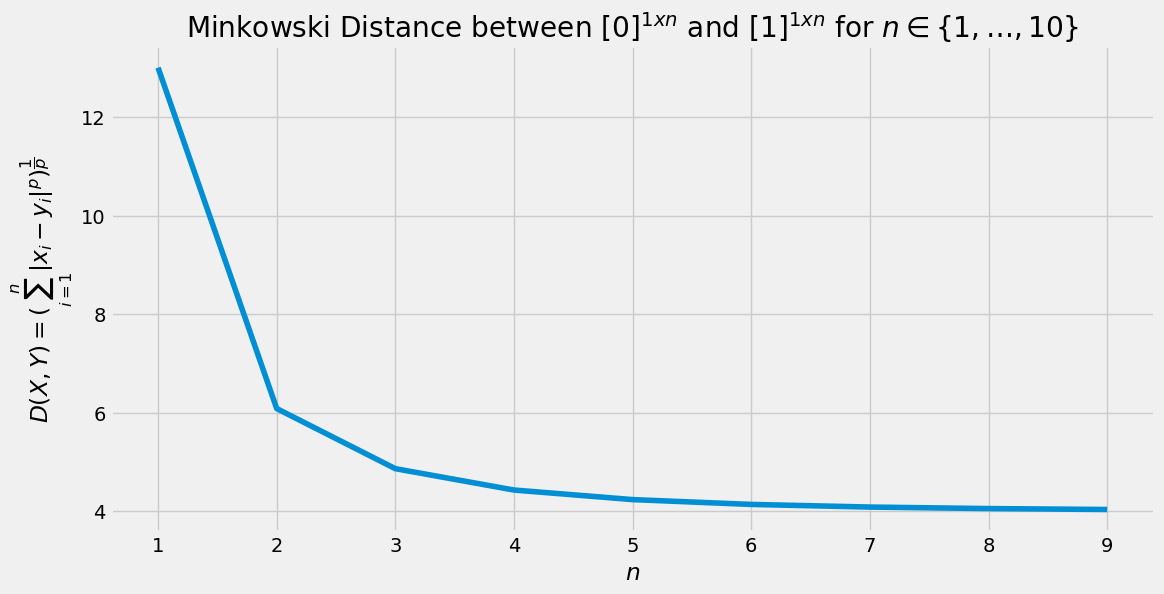

In [74]:
from scipy.spatial import minkowski_distance
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

row1 = [10, 20, 15, 10, 5]
row2 = [12, 24, 18, 8, 7]

plt.figure(figsize=(12, 6))
plt.title(
    "Minkowski Distance between $[0]^{1 x n}$ and $[1]^{1 x n}$ for $n \in \{1, \ldots, 10\}$"
)
plt.xlabel('$n$')
plt.ylabel('$ D(X,Y) = ( \sum_{i=1}^n | x_i - y_i |^p )^{\dfrac{1}{p}}$')
plt.plot(range(1, 10), [minkowski_distance(row1,row2, x) for x in range(1, 10)])


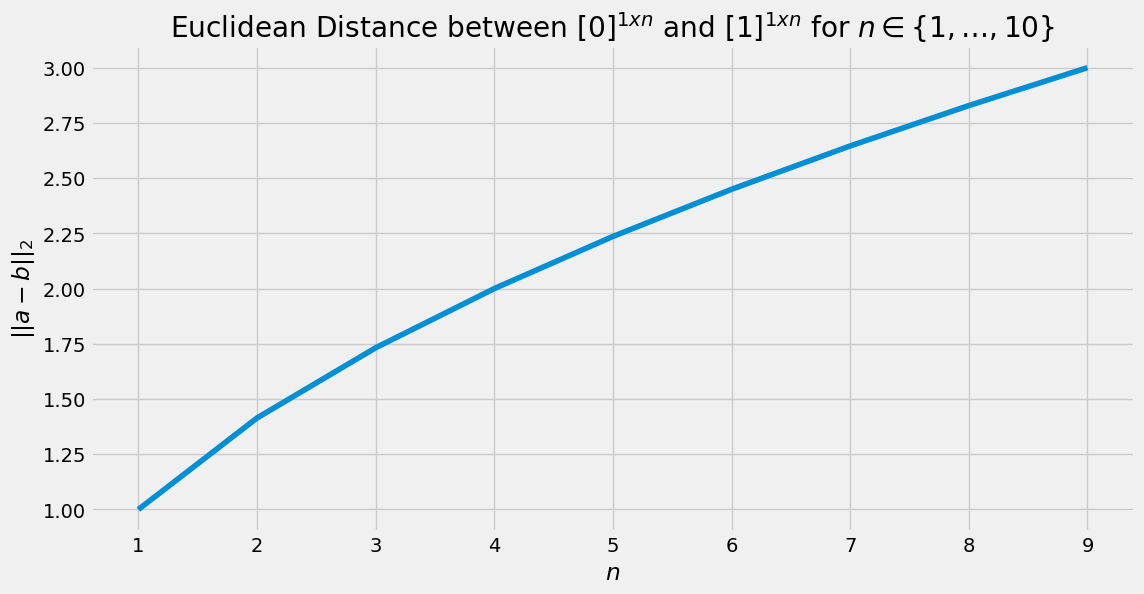

In [40]:

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import numpy as np
plt.figure(figsize=(12, 6))
plt.title(
    "Euclidean Distance between $[0]^{1 x n}$ and $[1]^{1 x n}$ for $n \in \{1, \ldots, 10\}$"
)
plt.xlabel('$n$')
plt.ylabel('$|| a - b ||_2$')
plt.plot(range(1, 10), np.sqrt(range(1, 10)))

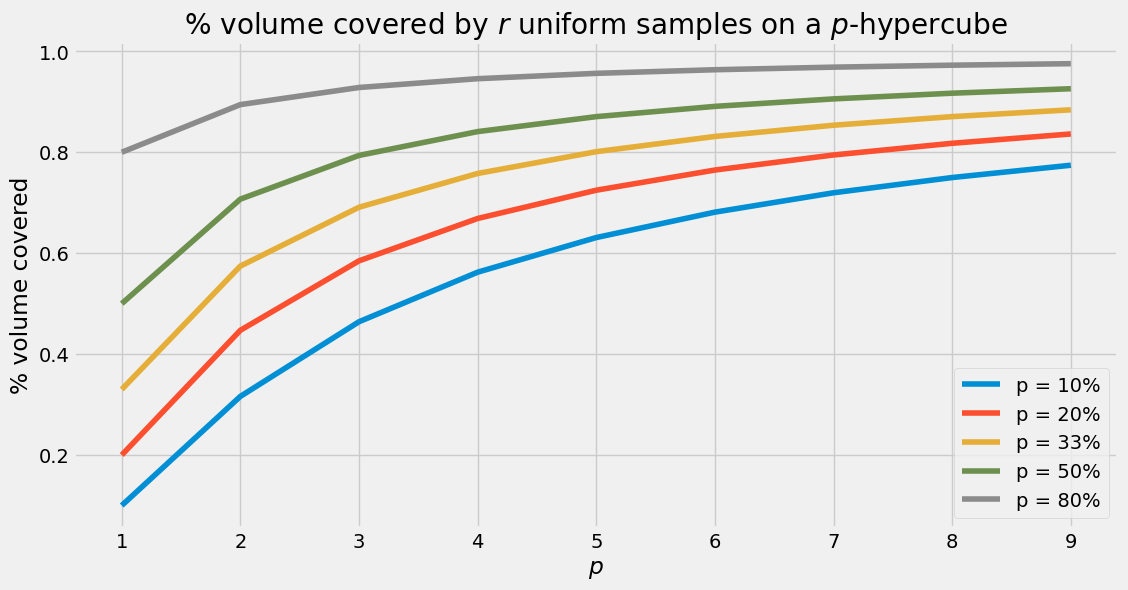

In [41]:
plt.figure(figsize=(12, 6))
plt.title(
    "% volume covered by $r$ uniform samples on a $p$-hypercube"
)
plt.xlabel('$p$')
plt.ylabel('% volume covered')

plt.plot(range(1, 10), [0.1**(1/n)  for n in range(1, 10)], label="p = 10%")
plt.plot(range(1, 10), [0.2**(1/n)  for n in range(1, 10)], label="p = 20%")
plt.plot(range(1, 10), [0.33**(1/n) for n in range(1, 10)], label="p = 33%")
plt.plot(range(1, 10), [0.5**(1/n)  for n in range(1, 10)], label="p = 50%")
plt.plot(range(1, 10), [0.8**(1/n)  for n in range(1, 10)], label="p = 80%")
plt.legend()

# References

- [ ] [k-Nearest Neighbors](https://www.kaggle.com/code/mmdatainfo/k-nearest-neighbors)
- [ ] [Loss Functions in Python - Easy Implementation](https://www.digitalocean.com/community/tutorials/loss-functions-in-python)
- [ ] [Curse of Dimensionality](https://www.kaggle.com/code/residentmario/curse-of-dimensionality/notebook)
- [ ] [K-Nearest Neighbors from Scratch with Python](https://www.askpython.com/python/examples/k-nearest-neighbors-from-scratch)
- [ ] [What Is the Curse of Dimensionality?](https://builtin.com/data-science/curse-dimensionality)